### New Implementation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

from magnetar_old import magnetar_old
from magnetar import magnetar

In [64]:
magnetar_old_i = magnetar_old(M_NS=1.4,R_NS=10,gamma=0,delta=0,decay_a=0,decay_alpha=1.25,B0=1E+12,
                         v_m=2.65E+7,rho_m=1/6.022E+23,t0=0,
                         P0=0.1,t_obvs=3.16e+16)
    
magnetar_old_i.Integratedipole()
    
if magnetar_old_i.obvs_type == '0':
    magnetar_old_i.Integrateprop()

magnetar_old_i.ProdNumerOutput()

In [65]:
magnetar_i = magnetar(gamma=0, delta=0, B_i=1E+12, v_NS=265, rho_0=1/6.022E+23, P0=0.1, t_obvs=3.16e+16, M_NS=1.4, R_NS=10, t0=0, 
                 grav_correction=False, B_decay=True, dipole_only=False)
    
magnetar_i.run()

[array([], dtype=float64)]
[array([], dtype=float64)]
3.16e+16
1.6864642217055388


Text(0, 0.5, 'Power [arbitrary units]')

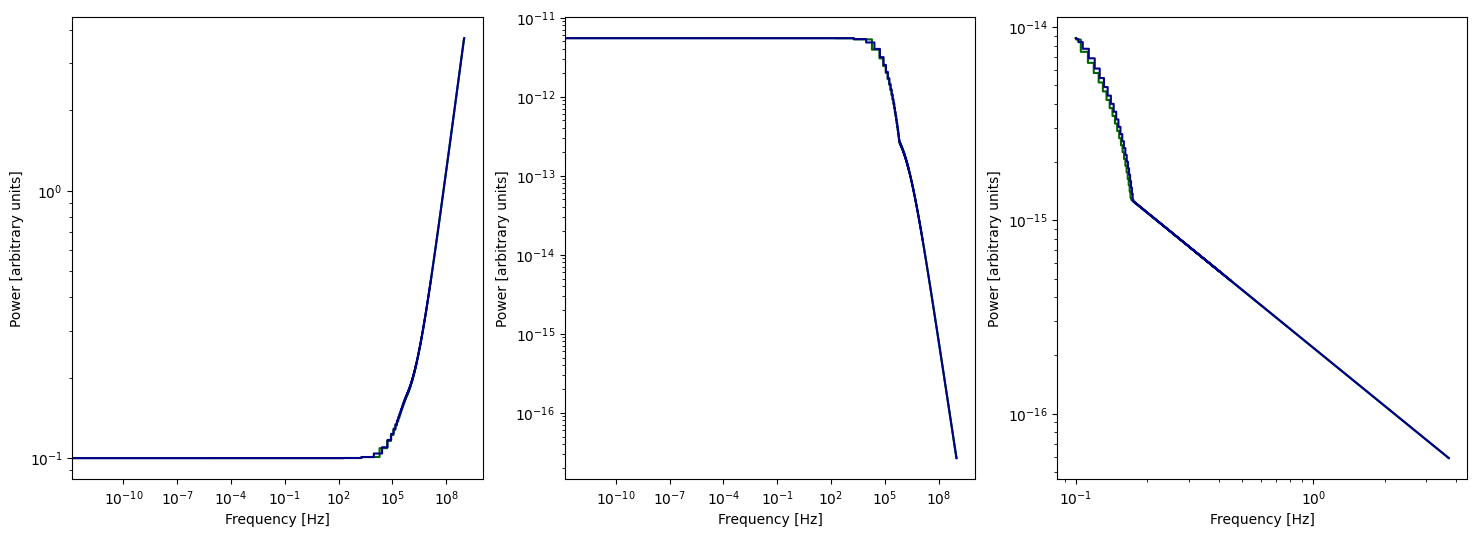

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(6)
fig.set_figwidth(18)

ax1.plot(magnetar_i.t_arr.to(u.year), magnetar_i.P_arr, ds="steps-mid",color='darkgreen',label='unbinned')
ax2.plot(magnetar_i.t_arr.to(u.year), -magnetar_i.dOmega_arr, ds="steps-mid", color='darkgreen',label='binned')
ax3.plot(magnetar_i.P_arr, magnetar_i.dP_arr, ds="steps-mid", color='darkgreen',label='binned')
ax1.plot(magnetar_old_i.t_arr_output, magnetar_old_i.P_arr_output, ds="steps-mid",color='darkblue',label='unbinned')
ax2.plot(magnetar_old_i.t_arr_output, -magnetar_old_i.Omega_dot_arr_output, ds="steps-mid", color='darkblue',label='binned')
ax3.plot(magnetar_old_i.P_arr_output, magnetar_old_i.P_dot_arr_output, ds="steps-mid", color='darkblue',label='binned')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax3.set_xscale('log')
ax3.set_yscale('log')


ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('Power [arbitrary units]')

ax2.set_xscale('log')


ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Power [arbitrary units]')


ax3.set_xscale('log')

ax3.set_xlabel('Frequency [Hz]')
ax3.set_ylabel('Power [arbitrary units]')